# Generating a Dataset with Descriptors and Morgan Fingerprints for Pre-Training #

## Import Necessary Libraries ##

In [5]:
import pandas as pd
import os

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters
from rdkit.Chem.rdchem import BondType
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [2]:
def PRINT() -> None: print(f"{'-'*80}\nDone\n{'-'*80}")
def PRINTM(M) -> None: print(f"{'-'*80}\n{M}\n{'-'*80}")

## Loading the Dataset ##

In [6]:
research_all_smiles_path = r"C:\Users\gavvi\Desktop\Programming\GitHub\DeepLearningResearchStarship\Research Projects\Project 5 Building Model for Research Pipeline\datasets\research_all_smiles.csv"
all_smiles_df = pd.read_csv(research_all_smiles_path)
all_smiles_df

,smiles
0,CCC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OCCCc1cc(OC)cc...
1,COc1ccccc1C1C2=C(N=c3s/c(=C\c4ccc(/C=C/C(=O)O)...
2,CSc1ccc(-c2c(C#N)c3cccc(Cl)n3c2NCCc2ccccc2)cc1
3,COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)[C@@H]2CCCN2...
4,CC(=O)O[C@H](CC1CC(=O)NC(=O)C1)[C@@H]1C[C@@H](...
...,...
26839,O=C1c2ccccc2C(=O)N1C[C@@H]1c2ccccc2CCN1C(=O)[C...
26840,C#CC1(C=C)C=CC(=O)C(C#N)=C1
26841,O=C(N1CCc2sccc2C1)n1ccnc1
26842,Cc1noc(C)c1-c1cnc2[nH]ccc2c1


In [12]:
len(all_smiles_df['smiles'].unique())

26844

In [16]:
all_smiles_df.rename(columns={'smiles' : 'SMILES'}, inplace=True)

In [17]:
pt_dataset = all_smiles_df

In [27]:
pt_dataset_adam = all_smiles_df
pt_dataset_adam.head()

,SMILES
0,CCC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OCCCc1cc(OC)cc...
1,COc1ccccc1C1C2=C(N=c3s/c(=C\c4ccc(/C=C/C(=O)O)...
2,CSc1ccc(-c2c(C#N)c3cccc(Cl)n3c2NCCc2ccccc2)cc1
3,COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)[C@@H]2CCCN2...
4,CC(=O)O[C@H](CC1CC(=O)NC(=O)C1)[C@@H]1C[C@@H](...


In [3]:
import os
import pandas as pd

In [4]:
pt_dataset_path = os.path.join('datasets', 'output_file.csv')
pt_dataset = pd.read_csv(pt_dataset_path)

PRINTM('Loaded the dataset successfully')

--------------------------------------------------------------------------------
Loaded the dataset successfully
--------------------------------------------------------------------------------


In [5]:
pt_dataset.head()

,Name,SMILES
0,NaN,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1
1,NaN,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1
2,NaN,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1
3,NaN,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC
4,NaN,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1


In [6]:
pt_dataset.drop(columns=['Name'], inplace=True)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [18]:
pt_dataset

,SMILES
0,CCC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OCCCc1cc(OC)cc...
1,COc1ccccc1C1C2=C(N=c3s/c(=C\c4ccc(/C=C/C(=O)O)...
2,CSc1ccc(-c2c(C#N)c3cccc(Cl)n3c2NCCc2ccccc2)cc1
3,COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)[C@@H]2CCCN2...
4,CC(=O)O[C@H](CC1CC(=O)NC(=O)C1)[C@@H]1C[C@@H](...
...,...
26839,O=C1c2ccccc2C(=O)N1C[C@@H]1c2ccccc2CCN1C(=O)[C...
26840,C#CC1(C=C)C=CC(=O)C(C#N)=C1
26841,O=C(N1CCc2sccc2C1)n1ccnc1
26842,Cc1noc(C)c1-c1cnc2[nH]ccc2c1


In [8]:
PRINTM(f'The shape of the dateset -> {pt_dataset.shape}')

--------------------------------------------------------------------------------
The shape of the dateset -> (40640, 1)
--------------------------------------------------------------------------------


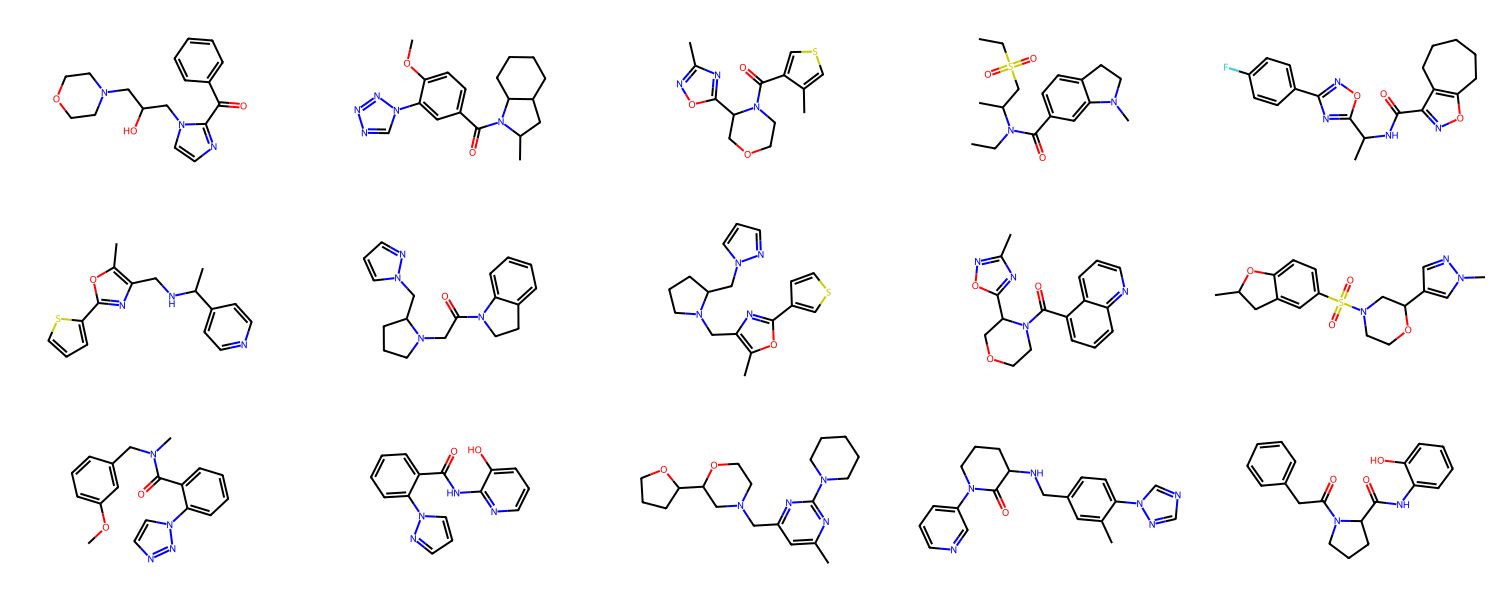

In [9]:
sample_smiles = pt_dataset['SMILES'].head(15)
molecules = [Chem.MolFromSmiles(smile) for smile in sample_smiles]

# Visualize the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 200))
img

## Generating Descriptors & Morgan Fingerprints ##

The next step after we've loaded the dataset is to generate for each molecule `SMILE` value descriptors and morgan fingerprints in order to train our pre train model with `chemprop`.

We will extract the descriptors and morgan finger prints usin `RDKit` bioinformatics open source.

In [19]:
initial_descriptor_names = [
    "NumAtomStereoCenters",
    "NumAminoBonds",
    "MolWt",
    "NumValenceElectrons",
    "TPSA",
    "MolLogP",
    "NumHeteroatoms",
    "NumRotatableBonds",
    "HeavyAtomCount",
    "FractionCSP3",
    "NumAtomStereoCenters",
    "NumAminoBonds"
]

In [20]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        initial_descriptors = [
            AllChem.CalcNumAtomStereoCenters(mol),
            AllChem.CalcNumAmideBonds(mol),
            Descriptors.MolWt(mol),
            Descriptors.NumValenceElectrons(mol),
            Descriptors.TPSA(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHeteroatoms(mol),
            Descriptors.NumRotatableBonds(mol),
            Descriptors.HeavyAtomCount(mol),
            Descriptors.FractionCSP3(mol)
        ]
        
        all_descriptors = []
        descriptor_names = []
        for name, func in Descriptors.descList:
            all_descriptors.append(func(mol))
            descriptor_names.append(name)
        
        # Compute Morgan fingerprints of size=100 and radius=2 in order to learn better representation of the molecules
        morgan_fp = GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
        morgan_fp_list = list(morgan_fp)
        morgan_fp_names = [f"MorganFP_{i}" for i in range(1024)]
        
        # Ensure we have at least 200 descriptors by padding if necessary
        if len(all_descriptors) < 200:
            all_descriptors.extend([None] * (200 - len(all_descriptors)))
            descriptor_names.extend([None] * (200 - len(descriptor_names)))
        
        # Replace the first 10 descriptors with the initial ones
        all_descriptors[:10] = initial_descriptors
        descriptor_names[:10] = initial_descriptor_names
        
        # Combine descriptors and Morgan fingerprints
        combined_descriptors = all_descriptors[:200] + morgan_fp_list
        combined_names = descriptor_names[:200] + morgan_fp_names
        
        return [smiles] + combined_descriptors, ["SMILES"] + combined_names
    else:
        return [smiles] + [None] * (200 + 1024), ["SMILES"] + [None] * (200 + 1024)

In [21]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        initial_descriptors = [
            AllChem.CalcNumAtomStereoCenters(mol),
            AllChem.CalcNumAmideBonds(mol),
            Descriptors.MolWt(mol),
            Descriptors.NumValenceElectrons(mol),
            Descriptors.TPSA(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHeteroatoms(mol),
            Descriptors.NumRotatableBonds(mol),
            Descriptors.HeavyAtomCount(mol),
            Descriptors.FractionCSP3(mol)
        ]
        
        all_descriptors = []
        descriptor_names = []
        for name, func in Descriptors.descList:
            all_descriptors.append(func(mol))
            descriptor_names.append(name)
        
        # Ensure we have at least 200 descriptors by padding if necessary
        if len(all_descriptors) < 200:
            all_descriptors.extend([None] * (200 - len(all_descriptors)))
            descriptor_names.extend([None] * (200 - len(descriptor_names)))
        
        # Replace the first 10 descriptors with the initial ones
        all_descriptors[:10] = initial_descriptors
        descriptor_names[:10] = [
            "NumAtomStereoCenters", 
            "NumAmideBonds", 
            "MolWt", 
            "NumValenceElectrons", 
            "TPSA", 
            "MolLogP", 
            "NumHeteroatoms", 
            "NumRotatableBonds", 
            "HeavyAtomCount", 
            "FractionCSP3"
        ]
        
        return [smiles] + all_descriptors[:200], ["SMILES"] + descriptor_names[:200]
    else:
        return [smiles] + [None] * 200, ["SMILES"] + [None] * 200

In [22]:
def generate_descriptors_df(df) -> pd.DataFrame:
    """
    Helper function that takes a list of molecule's SMILES values and generates a DataFrame
    with SMILES and 200 features, including specified descriptors.

    Params:
    - smiles_list (list of str): List of molecule's SMILES values as strings.

    Returns:
    - DataFrame: A DataFrame with the first column as SMILES and the other 200 columns as features.
    """
    data = []
    column_names = None
    for smiles in df['SMILES']:
        descriptors, names = generate_descriptors(smiles)
        data.append(descriptors)
        if column_names is None:
            column_names = names
    
    # Create DataFrame in the format of (SMILES, |<descriptors>| = 1224)
    df = pd.DataFrame(data, columns=column_names)
    
    return df

In [23]:
pt_dataset.head()

,SMILES
0,CCC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OCCCc1cc(OC)cc...
1,COc1ccccc1C1C2=C(N=c3s/c(=C\c4ccc(/C=C/C(=O)O)...
2,CSc1ccc(-c2c(C#N)c3cccc(Cl)n3c2NCCc2ccccc2)cc1
3,COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)[C@@H]2CCCN2...
4,CC(=O)O[C@H](CC1CC(=O)NC(=O)C1)[C@@H]1C[C@@H](...


### Adam Chemical Descriptors Feature Generation Script ####

In [26]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, Lipinski

def compute_extended_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptor_names = [desc_name for desc_name, _ in Descriptors.descList]
    # print("MolLogP" in descriptor_names)
    try:
        descriptor_values = [desc_fn(mol) for _, desc_fn in Descriptors.descList]
        # Add custom descriptor names
        custom_descriptor_names = [ 'NumAtomStereoCenters', 'NumAmideBonds']
        custom_descriptor_names = [x for x in custom_descriptor_names if x not in descriptor_names]
        # print(custom_descriptor_names)
        descriptor_names.extend(custom_descriptor_names)

        # Compute additional custom descriptor values
        descriptor_values.extend([
            AllChem.CalcNumAtomStereoCenters(mol),
            AllChem.CalcNumAmideBonds(mol)
        ])

        # Truncate or pad descriptors to obtain exactly 200 descriptors
        # print(len(descriptor_names))
        # print(len(descriptor_values))
        if len(descriptor_names) > 211:
            descriptor_names = descriptor_names[:211]
            descriptor_values = descriptor_values[:211]
        elif len(descriptor_names) < 211:
            padding = 211 - len(descriptor_names)
            descriptor_names.extend([f'Padding_{i + 1}' for i in range(padding)])
            descriptor_values.extend([0] * padding)

        return pd.Series(descriptor_values, index=descriptor_names)
    except:
        return None


In [ ]:
# Compute descriptors
descriptors_df = pt_dataset_adam['SMILES'].apply(compute_extended_descriptors)

# Concatenate the original DataFrame with the descriptors DataFrame
test_211_descriptors = pd.concat([pt_dataset_adam, descriptors_df], axis=1)

test_211_descriptors = test_211_descriptors.drop(columns = ["labeled"])
test_211_descriptors

In [33]:
adam_desc = test_211_descriptors.columns
pt_dataset

,SMILES
0,CCC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OCCCc1cc(OC)cc...
1,COc1ccccc1C1C2=C(N=c3s/c(=C\c4ccc(/C=C/C(=O)O)...
2,CSc1ccc(-c2c(C#N)c3cccc(Cl)n3c2NCCc2ccccc2)cc1
3,COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)[C@@H]2CCCN2...
4,CC(=O)O[C@H](CC1CC(=O)NC(=O)C1)[C@@H]1C[C@@H](...
...,...
26839,O=C1c2ccccc2C(=O)N1C[C@@H]1c2ccccc2CCN1C(=O)[C...
26840,C#CC1(C=C)C=CC(=O)C(C#N)=C1
26841,O=C(N1CCc2sccc2C1)n1ccnc1
26842,Cc1noc(C)c1-c1cnc2[nH]ccc2c1


### Generate Descriptors and Morgan Fingerprints ###

In [ ]:
pt_dataset_final = generate_descriptors_df(pt_dataset)
PRINTM('Generated new data frame with descriptors !')

In [21]:
pt_dataset_final

,SMILES,NumAtomStereoCenters,NumAmideBonds,MolWt,NumValenceElectrons,TPSA,MolLogP,NumHeteroatoms,NumRotatableBonds,HeavyAtomCount,...,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN
0,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1,1,0,315.373,122,67.59,0.80720,6,6,23,...,0,0,0,0,0,0,0,0,0,0
1,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1,3,1,341.415,132,73.14,2.46410,7,3,25,...,0,0,0,0,0,0,0,0,0,0
2,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1,1,1,293.348,106,68.46,1.96164,7,2,20,...,0,0,0,0,0,0,0,0,0,0
3,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC,1,1,338.473,128,57.69,1.96420,6,6,23,...,0,0,0,0,0,0,0,0,0,0
4,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1,1,1,370.384,140,94.05,3.62360,8,4,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40635,CC(C)(CNC(=N)N)N1CCc2ccccc2C1.I,0,0,374.270,106,65.14,1.92437,5,3,19,...,0,0,0,0,0,0,0,0,0,0
40636,Cc1ccc(C2=NN(C(=O)c3cccnc3)C(c3ccc(F)cc3)C2)cc...,1,1,395.865,142,45.56,4.94242,6,3,28,...,0,0,0,0,0,0,0,0,1,0
40637,CCOc1cccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CC2CC...,2,1,419.481,160,87.68,3.90520,7,6,31,...,1,1,0,0,0,0,0,0,0,0
40638,CCn1cc(C2CSCCN2)cn1.Cl.Cl,1,0,270.229,88,29.85,2.12410,6,2,15,...,0,0,0,0,0,0,0,0,0,0


In [16]:
rows_with_null = pt_dataset_final[pt_dataset_final.isnull().any(axis=1)]

PRINTM(f'There are -> {rows_with_null.shape[0]} rows that contains missing values in some of their column values (can be in more than one)')

--------------------------------------------------------------------------------
There are -> 40640 rows that contains missing values in some of their column values (can be in more than one)
--------------------------------------------------------------------------------


In [19]:
pt_dataset_final

,SMILES,NumAtomStereoCenters,NumAminoBonds,MolWt,NumValenceElectrons,TPSA,MolLogP,NumHeteroatoms,NumRotatableBonds,HeavyAtomCount,...,MorganFP_1014,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023
0,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1,1,0,315.373,122,67.59,0.80720,6,6,23,...,1,0,0,0,0,0,0,0,0,0
1,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1,3,1,341.415,132,73.14,2.46410,7,3,25,...,0,0,0,0,0,1,0,0,0,0
2,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1,1,1,293.348,106,68.46,1.96164,7,2,20,...,0,0,0,0,0,1,0,0,0,1
3,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC,1,1,338.473,128,57.69,1.96420,6,6,23,...,0,0,0,0,0,0,0,0,0,0
4,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1,1,1,370.384,140,94.05,3.62360,8,4,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40635,CC(C)(CNC(=N)N)N1CCc2ccccc2C1.I,0,0,374.270,106,65.14,1.92437,5,3,19,...,0,0,0,0,0,0,0,0,0,0
40636,Cc1ccc(C2=NN(C(=O)c3cccnc3)C(c3ccc(F)cc3)C2)cc...,1,1,395.865,142,45.56,4.94242,6,3,28,...,0,0,0,0,0,1,0,0,0,0
40637,CCOc1cccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CC2CC...,2,1,419.481,160,87.68,3.90520,7,6,31,...,0,0,0,0,0,1,0,0,0,0
40638,CCn1cc(C2CSCCN2)cn1.Cl.Cl,1,0,270.229,88,29.85,2.12410,6,2,15,...,0,0,0,0,0,1,0,0,0,0


In [20]:
pt_dataset_final.to_csv(os.path.join('datasets', 'pt_dataset.csv'), index=False)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [120]:
pt_dataset_final = pd.read_csv(os.path.join('datasets', 'pt_dataset.csv'))
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


### Handle Missing Values ###

The next step is verify whether there are any missing values (i.e., `Nan`) in the dataset. If there are any missing values, we will switch them with *0*. The reason for `Nan` value in some column for a givin SMILES can be the idea that the molecule doesnt have any recond for that descripton etc.

In [81]:
pt_dataset_final = pd.read_csv(os.path.join('datasets', 'pt_dataset.csv'))
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [83]:
rows_with_null = pt_dataset_final[pt_dataset_final.isnull().any(axis=1)]

PRINTM(f'There are -> {rows_with_null.shape[0]} rows that contains missing values in some of their column values (can be in more than one)')

--------------------------------------------------------------------------------
There are -> 1 rows that contains missing values in some of their column values (can be in more than one)
--------------------------------------------------------------------------------


In [84]:
def find_nan_columns(row):
    nan_columns = row[row.isna()].index.tolist()
    return nan_columns

In [85]:
pt_dataset_final['missing values columns'] = pt_dataset_final.apply(find_nan_columns, axis=1)
result_df = pt_dataset_final[pt_dataset_final['missing values columns'].apply(lambda x: len(x) > 0)]
result_df = result_df[['SMILES', 'missing values columns']]

PRINTM(f'The next data frame holds SMILES and their descriptor name that holds Nan values:')
result_df

--------------------------------------------------------------------------------
The next data frame holds SMILES and their descriptor name that holds Nan values:
--------------------------------------------------------------------------------


,SMILES,missing values columns
31232,O=C([O-])Cc1csc(Cc2cccc(Cl)c2)n1.[Na+],"[FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MW..."


We can see that there is only one SMILES - `O=C([O-])Cc1csc(Cc2cccc(Cl)c2)n1.[Na+]` , that has columns of descriptors with missing values. After checking the other datasets, we've verified that this molecule is not present in them. Therefore, we will drop the row representing this SMILES because of the missing values. Since we have a large dataset (> 40,000), removing one row will not harm the pre-training process.

In [86]:
smiles_to_drop = 'O=C([O-])Cc1csc(Cc2cccc(Cl)c2)n1.[Na+]'
pt_dataset_final = pt_dataset_final[pt_dataset_final['SMILES'] != smiles_to_drop]
PRINTM(f'Dropped single row that represents the molecule SMILES:\nO=C([O-])Cc1csc(Cc2cccc(Cl)c2)n1.[Na+] successfully !')

--------------------------------------------------------------------------------
Dropped single row that represents the molecule SMILES:
O=C([O-])Cc1csc(Cc2cccc(Cl)c2)n1.[Na+] successfully !
--------------------------------------------------------------------------------


In [87]:
rows_with_null = pt_dataset_final[pt_dataset_final.isnull().any(axis=1)]
PRINTM(f'There are -> {rows_with_null.shape[0]} rows that contains missing values in some of their column values (can be in more than one)')

--------------------------------------------------------------------------------
There are -> 0 rows that contains missing values in some of their column values (can be in more than one)
--------------------------------------------------------------------------------


### Normalize the Data by Standart Scaler ###

In [90]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [95]:
smiles_column = 'SMILES'
descriptor_columns = pt_dataset_final.columns[1:201]
morgan_fp_columns = pt_dataset_final.columns[201:]  

In [96]:
smiles = pt_dataset_final[smiles_column].reset_index(drop=True)
descriptors = pt_dataset_final[descriptor_columns].reset_index(drop=True)
morgan_fps = pt_dataset_final[morgan_fp_columns].reset_index(drop=True)

scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptors)
scaled_descriptors_df = pd.DataFrame(scaled_descriptors, columns=descriptor_columns)

# Combine the SMILES, scaled descriptors, and Morgan fingerprints back into a single df
scaled_pt_dataset_final = pd.concat([smiles, scaled_descriptors_df, morgan_fps], axis=1)

In [97]:
scaled_pt_dataset_final

,SMILES,NumAtomStereoCenters,NumAminoBonds,MolWt,NumValenceElectrons,TPSA,MolLogP,NumHeteroatoms,NumRotatableBonds,HeavyAtomCount,...,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023,missing values columns
0,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1,0.275350,-1.282888,-0.845050,-0.596121,-0.161588,-2.263520,-0.537124,1.030293,-0.672638,...,0,0,0,0,0,0,0,0,0,[]
1,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1,2.681269,-0.284300,-0.324994,-0.044691,0.165290,-0.451371,0.148930,-0.852016,-0.099342,...,0,0,0,0,1,0,0,0,0,[]
2,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1,0.275350,-0.284300,-1.284886,-1.478409,-0.110347,-1.000911,0.148930,-1.479452,-1.532583,...,0,0,0,0,1,0,0,0,1,[]
3,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC,0.275350,-0.284300,-0.383746,-0.265263,-0.744666,-0.998111,-0.537124,1.030293,-0.672638,...,0,0,0,0,0,0,0,0,0,[]
4,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1,0.275350,-0.284300,0.253513,0.396453,1.396822,0.816772,0.834984,-0.224580,0.473955,...,0,0,0,0,0,0,0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40634,CC(C)(CNC(=N)N)N1CCc2ccccc2C1.I,-0.927610,-1.282888,0.331116,-1.478409,-0.305885,-1.041673,-1.223178,-0.852016,-1.819231,...,0,0,0,0,0,0,0,0,0,[]
40635,Cc1ccc(C2=NN(C(=O)c3cccnc3)C(c3ccc(F)cc3)C2)cc...,0.275350,-0.284300,0.762365,0.506739,-1.459084,2.259163,-0.537124,-0.852016,0.760603,...,0,0,0,0,1,0,0,0,0,[]
40636,CCOc1cccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CC2CC...,1.478309,-0.284300,1.233974,1.499314,1.021650,1.124757,0.148930,1.030293,1.620548,...,0,0,0,0,1,0,0,0,0,[]
40637,CCn1cc(C2CSCCN2)cn1.Cl.Cl,0.275350,-1.282888,-1.746570,-2.470983,-2.384354,-0.823228,-0.537124,-1.479452,-2.965824,...,0,0,0,0,1,0,0,0,0,[]


In [113]:
scaled_pt_dataset_final.drop(columns=['missing values columns'], inplace=True)
PRINT()

--------------------------------------------------------------------------------
Done
--------------------------------------------------------------------------------


In [115]:
PRINTM(f'First 50 descriptors of the dataset:\n\n{scaled_pt_dataset_final.columns.tolist()[:50]}')

--------------------------------------------------------------------------------
First 50 descriptors of the dataset:

['SMILES', 'NumAtomStereoCenters', 'NumAminoBonds', 'MolWt', 'NumValenceElectrons', 'TPSA', 'MolLogP', 'NumHeteroatoms', 'NumRotatableBonds', 'HeavyAtomCount', 'FractionCSP3', 'NumAtomStereoCenters.1', 'NumAminoBonds.1', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA']
--------------------------------------------------------------------------------


In [116]:
scaled_pt_dataset_final.to_csv(os.path.join('datasets', 'pt_dataset_final_scaled.csv'), index=False)
PRINTM('Saved')

--------------------------------------------------------------------------------
Saved
--------------------------------------------------------------------------------


In [117]:
scaled_pt_dataset_final

,SMILES,NumAtomStereoCenters,NumAminoBonds,MolWt,NumValenceElectrons,TPSA,MolLogP,NumHeteroatoms,NumRotatableBonds,HeavyAtomCount,...,MorganFP_1014,MorganFP_1015,MorganFP_1016,MorganFP_1017,MorganFP_1018,MorganFP_1019,MorganFP_1020,MorganFP_1021,MorganFP_1022,MorganFP_1023
0,O=C(c1ccccc1)c1nccn1CC(O)CN1CCOCC1,0.275350,-1.282888,-0.845050,-0.596121,-0.161588,-2.263520,-0.537124,1.030293,-0.672638,...,1,0,0,0,0,0,0,0,0,0
1,COc1ccc(C(=O)N2C(C)CC3CCCCC32)cc1-n1cnnn1,2.681269,-0.284300,-0.324994,-0.044691,0.165290,-0.451371,0.148930,-0.852016,-0.099342,...,0,0,0,0,0,1,0,0,0,0
2,Cc1noc(C2COCCN2C(=O)c2cscc2C)n1,0.275350,-0.284300,-1.284886,-1.478409,-0.110347,-1.000911,0.148930,-1.479452,-1.532583,...,0,0,0,0,0,1,0,0,0,1
3,CCN(C(=O)c1ccc2c(c1)N(C)CC2)C(C)CS(=O)(=O)CC,0.275350,-0.284300,-0.383746,-0.265263,-0.744666,-0.998111,-0.537124,1.030293,-0.672638,...,0,0,0,0,0,0,0,0,0,0
4,CC(NC(=O)c1noc2c1CCCCC2)c1nc(-c2ccc(F)cc2)no1,0.275350,-0.284300,0.253513,0.396453,1.396822,0.816772,0.834984,-0.224580,0.473955,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40634,CC(C)(CNC(=N)N)N1CCc2ccccc2C1.I,-0.927610,-1.282888,0.331116,-1.478409,-0.305885,-1.041673,-1.223178,-0.852016,-1.819231,...,0,0,0,0,0,0,0,0,0,0
40635,Cc1ccc(C2=NN(C(=O)c3cccnc3)C(c3ccc(F)cc3)C2)cc...,0.275350,-0.284300,0.762365,0.506739,-1.459084,2.259163,-0.537124,-0.852016,0.760603,...,0,0,0,0,0,1,0,0,0,0
40636,CCOc1cccc(C2c3c(-c4ccccc4O)n[nH]c3C(=O)N2CC2CC...,1.478309,-0.284300,1.233974,1.499314,1.021650,1.124757,0.148930,1.030293,1.620548,...,0,0,0,0,0,1,0,0,0,0
40637,CCn1cc(C2CSCCN2)cn1.Cl.Cl,0.275350,-1.282888,-1.746570,-2.470983,-2.384354,-0.823228,-0.537124,-1.479452,-2.965824,...,0,0,0,0,0,1,0,0,0,0
